# Lab 3

`LabelEncoder` and `OneHotEncoder` are used to label the data which are strings into numerical values.

## Imports

In [29]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, Imputer

data = pd.read_csv('./Data/Data.csv')

In [30]:
data.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
Country      10 non-null object
Age          9 non-null float64
Salary       9 non-null float64
Purchased    10 non-null object
dtypes: float64(2), object(2)
memory usage: 400.0+ bytes


## Imputer, LabelEncoder, and OneHotEncoder

In [37]:
X = data.iloc[:, :-1].values
y = data.iloc[:, 3].values

In [38]:
from sklearn.preprocessing import Imputer

imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
imputer = imputer.fit(X[:, 1:3]) 

X[:, 1:3] = imputer.transform(X[:, 1:3])

In [39]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder 

labelencoder_X = LabelEncoder()
X[:, 0] = labelencoder_X.fit_transform(X[:, 0])

onehotencoder = OneHotEncoder(categorical_features = [0])
X = onehotencoder.fit_transform(X).toarray()

labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [41]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()

X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [52]:
print(X_test)

[[-1.          2.64575131 -0.77459667 -1.45882927 -0.90166297]
 [-1.          2.64575131 -0.77459667  1.98496442  2.13981082]]


## Salary Predictions

In [2]:
import seaborn as sns

sns.regplot(salary_data['YearsExperience'], salary_data['Salary'])

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('./Data/Salary_Data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

# Feature Scaling
"""from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)"""

# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

/Users/abhishek/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
print(regressor.predict([[8]]))

[101583.73178901]


## Startups

In [14]:
import pandas as pd
import matplotlib as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [12, 6]

data = pd.read_csv('./Data/50_Startups.csv')

data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


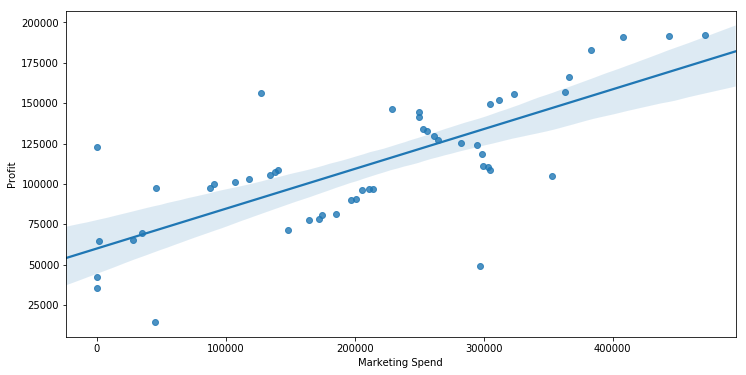

In [15]:
sns.regplot(data['Marketing Spend'], data['Profit'])

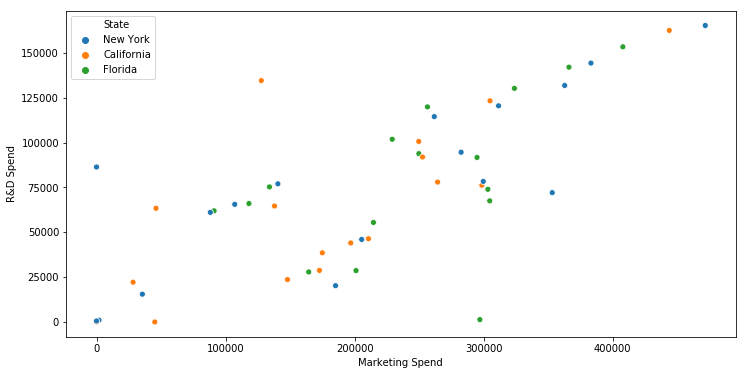

In [27]:
sns.scatterplot(x='Marketing Spend', y='R&D Spend', hue='State', data=data)

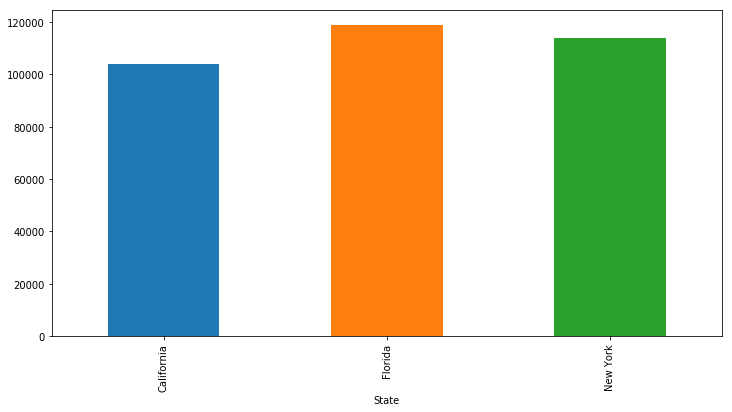

In [35]:
data['Profit'].groupby(data['State']).mean().plot.bar()

In [62]:
from sklearn.model_selection import train_test_split

X = data['Marketing Spend'].values
y = data['Profit'].values

X_train, X_test, y_train, y_test = train_test_split(X.reshape(-1, 1), y.reshape(-1, 1), test_size=0.2, random_state=0)

In [64]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

In [66]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

In [74]:
df['Diff'] = df.apply(lambda row: (row['Actual'] - row['Predicted']), axis=1)

In [75]:
df.head()

,Actual,Predicted,Diff
0,103282.38,88778.925844,14503.454156
1,144259.40,121159.909380,23099.490620
2,146121.95,116095.048442,30026.901558
3,77798.83,100177.178407,-22378.348407
4,191050.39,160084.601910,30965.788090


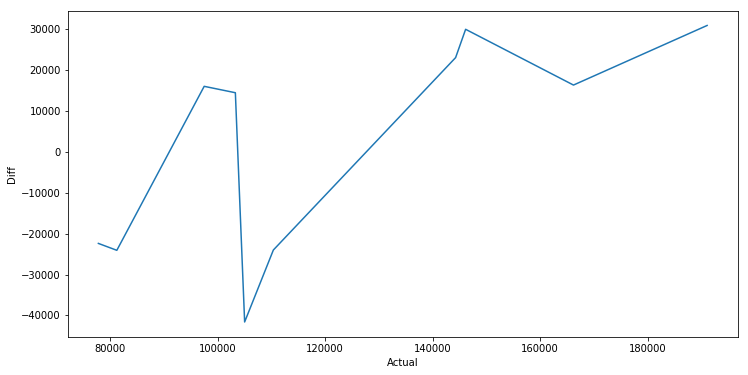

In [79]:
sns.lineplot(df['Actual'], df['Diff'])

## In-Lab 2